In [90]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
# Load the dataset (Modify sheet name if needed)
file_path = 'heart_disease.xlsx'
df = pd.read_excel(file_path)


In [24]:
ExcelTable = pd.ExcelFile('heart_disease.xlsx')
Context = pd.read_excel(ExcelTable, 'Description')
df = pd.read_excel(ExcelTable, 'Heart_disease')
df.head()

age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [26]:
df.shape

(908, 13)

In [27]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [28]:
df.describe()

age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000

In [29]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [30]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [31]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [32]:
df.duplicated().sum()


1

In [33]:
df.drop_duplicates(inplace=True)

In [34]:
df.duplicated().sum()

0

In [35]:
df['cp'].value_counts()

cp
asymptomatic       495
non-anginal        202
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [36]:
df['sex'].value_counts()


sex
Male      717
Female    190
Name: count, dtype: int64

In [37]:
df['fbs'].value_counts()

fbs
False    722
True     185
Name: count, dtype: int64

In [38]:
df['restecg'].value_counts()


restecg
normal              542
lv hypertrophy      187
st-t abnormality    178
Name: count, dtype: int64

In [39]:
df['exang'].value_counts()


exang
False    516
True     336
TURE      36
FALSE     19
Name: count, dtype: int64

In [40]:
df['slope'].value_counts()


slope
flat           453
upsloping      298
downsloping    156
Name: count, dtype: int64

In [41]:
df['thal'].value_counts()

thal
normal               385
reversable defect    346
fixed defect         176
Name: count, dtype: int64

In [42]:
label_encoder = LabelEncoder()

In [43]:
# Apply Label Encoding to the 'sex' column
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])

In [44]:
# Retrieve the mapping for 'sex'
sex_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("\nMapping for 'sex':", sex_mapping)


Mapping for 'sex': {'Female': 0, 'Male': 1}


In [47]:
# Apply Label Encoding to the 'cp' column
df['cp_encoded'] = label_encoder.fit_transform(df['cp'])

In [48]:
# Retrieve the mapping for 'cp'
cp_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'cp':", cp_mapping)

Mapping for 'cp': {'asymptomatic': 0, 'atypical angina': 1, 'non-anginal': 2, 'typical angina': 3}


In [49]:
# Apply Label Encoding to the 'fbs' column
df['fbs_encoded'] = label_encoder.fit_transform(df['fbs'])

In [50]:
# Apply Label Encoding to the 'restecg' column
df['restecg_encoded'] = label_encoder.fit_transform(df['restecg'])

In [51]:
# Retrieve the mapping for 'restecg'
restecg_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'restecg':", restecg_mapping)

Mapping for 'restecg': {'lv hypertrophy': 0, 'normal': 1, 'st-t abnormality': 2}


In [52]:
# Apply Label Encoding to the 'slope' column
df['slope_encoded'] = label_encoder.fit_transform(df['slope'])

In [57]:
# Retrieve the mapping for 'slope'
slope_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'slope':", slope_mapping)

Mapping for 'slope': {'downsloping': 0, 'flat': 1, 'upsloping': 2}


In [58]:
# Apply Label Encoding to the 'thal' column
df['thal_encoded'] = label_encoder.fit_transform(df['thal'])

In [59]:
# Retrieve the mapping for 'thal'
thal_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'thal':", thal_mapping)

Mapping for 'thal': {'fixed defect': 0, 'normal': 1, 'reversable defect': 2}


In [60]:
df['exang'].value_counts()

exang
False    516
True     336
TURE      36
FALSE     19
Name: count, dtype: int64

In [61]:
# Replace string representations with boolean values
df['exang'] = df['exang'].replace({'TRUE': True, 'FALSE': False, 'TURE': True})

<ipython-input-61-652feb545f4b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].replace({'TRUE': True, 'FALSE': False, 'TURE': True})


In [62]:
# Convert the column to boolean type
df['exang'] = df['exang'].astype(bool)

In [63]:
df['exang'].value_counts()

exang
False    535
True     372
Name: count, dtype: int64

In [64]:
# Apply Label Encoding to the 'exang' column
df['exang_encoded'] = label_encoder.fit_transform(df['exang'])

In [65]:
# Retrieve the mapping for 'exang'
exang_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Mapping for 'exang':", exang_mapping)

Mapping for 'exang': {False: 0, True: 1}


In [66]:
columns_to_drop = ['sex','cp', 'fbs','thal','restecg','slope','exang']  # Specify the columns you want to drop
df = df.drop(columns=columns_to_drop)

In [67]:
df.head()

age  trestbps  chol  thalch  oldpeak  num  sex_encoded  cp_encoded  \
0   63       145   233     150      2.3    0            1           3   
1   41       135   203     132      0.0    0            1           1   
2   57       140   192     148      0.4    0            1           0   
3   52       118   186     190      0.0    0            1           3   
4   57       110   201     126      1.5    0            1           0   

   fbs_encoded  restecg_encoded  slope_encoded  thal_encoded  exang_encoded  
0            1                0              0             0              0  
1            0                1              1             0              0  
2            0                1              1             0              0  
3            0                0              1             0              0  
4            0                1              1             0              1

<Figure size 1500x1000 with 0 Axes>

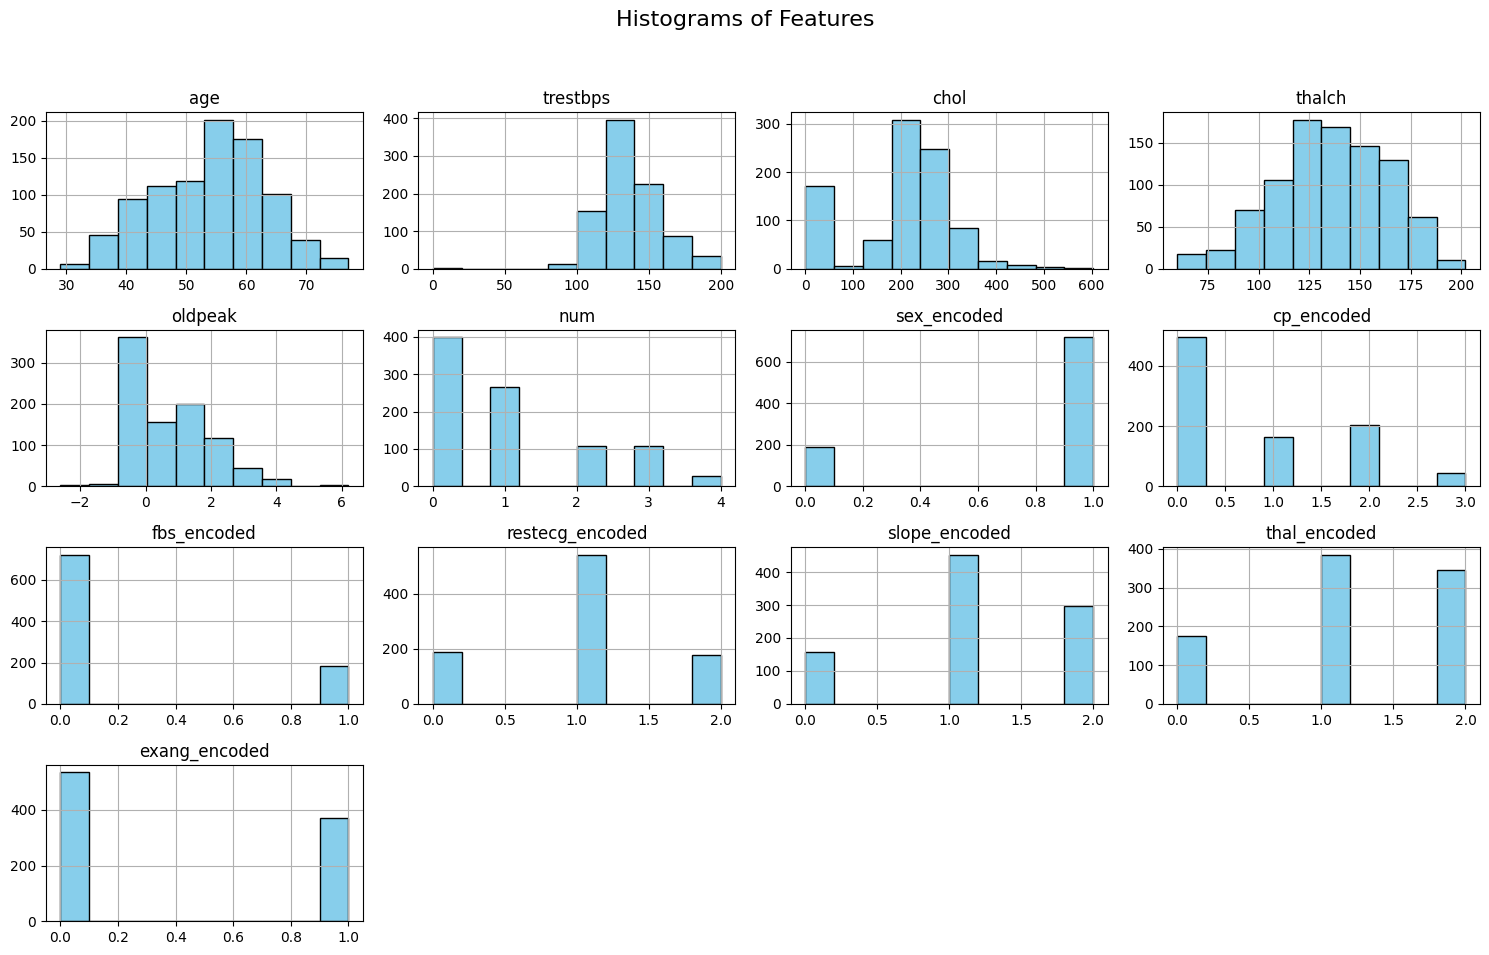

In [68]:
# 1. Histograms
num_features = len(df.columns)  # Get the number of features
num_rows = (num_features // 4) + (num_features % 4 > 0)  # Calculate number of rows needed

plt.figure(figsize=(15, 10))
df.hist(bins=10, figsize=(15, 10), layout=(num_rows, 4), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [69]:
# Set the style of seaborn
sns.set(style="whitegrid")

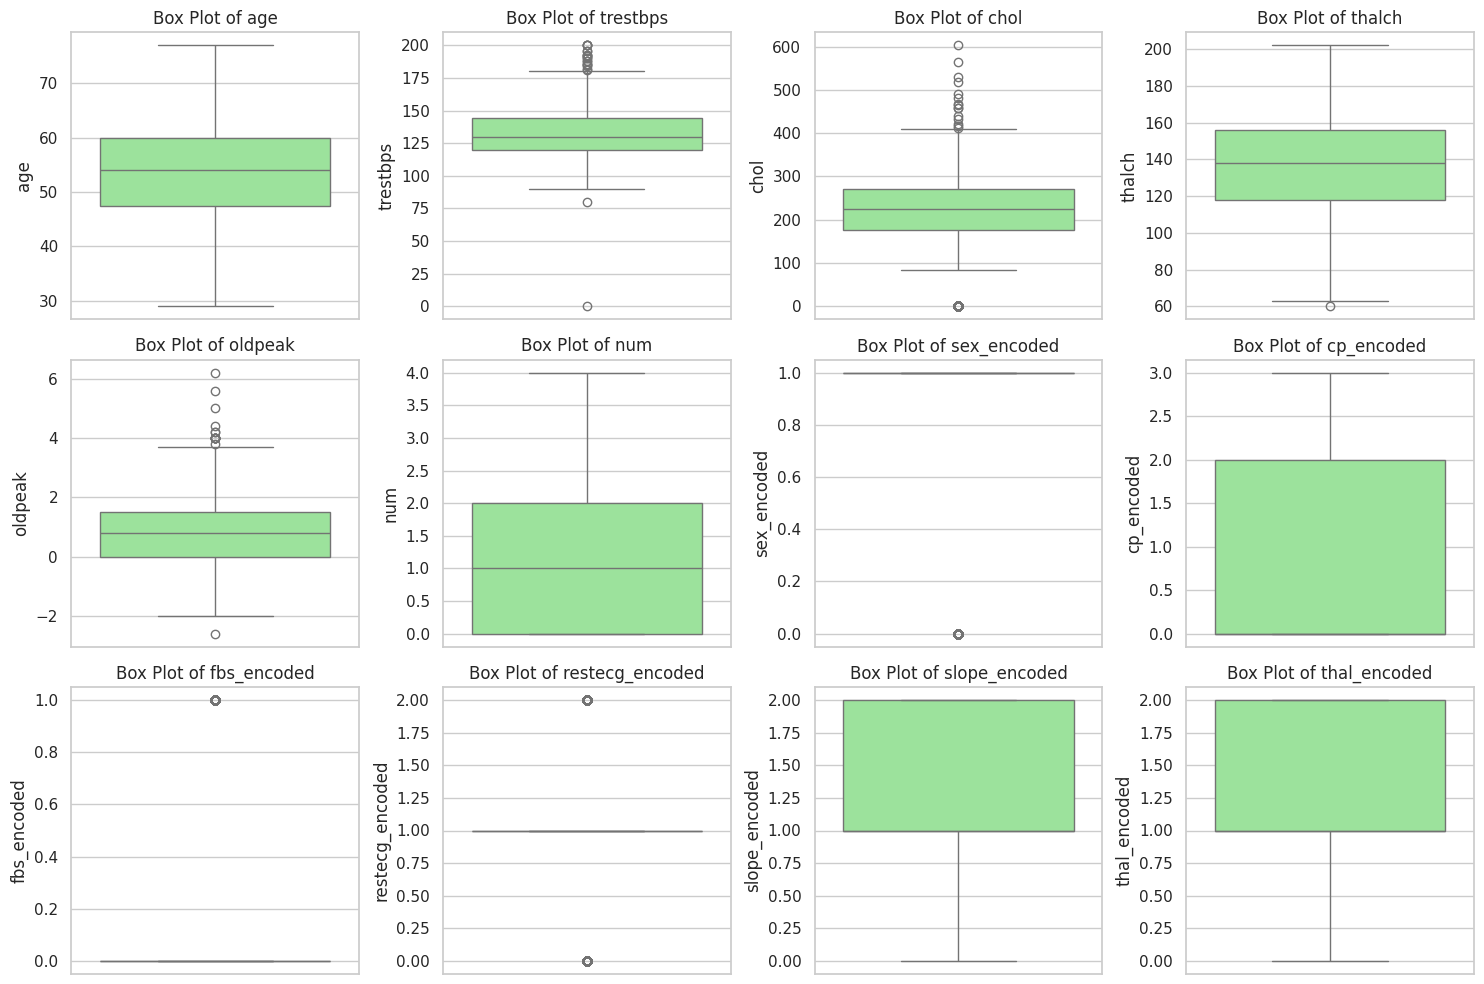

In [70]:
# 2. Box Plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'num' for box plots
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[column], color='lightgreen')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

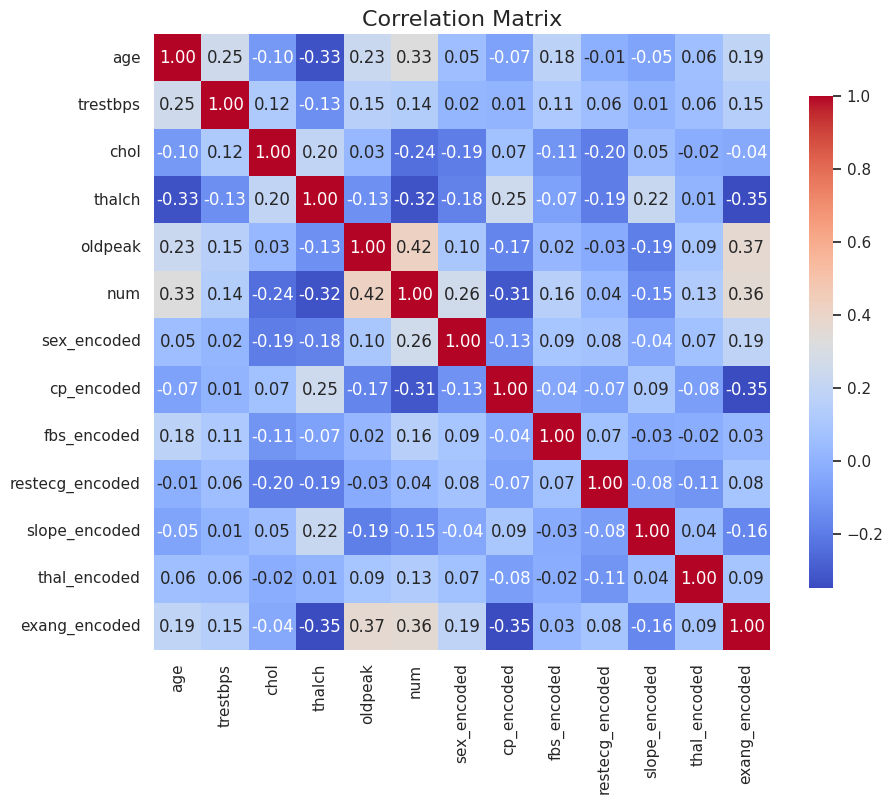

In [71]:
# 3. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix', fontsize=16)
plt.show()

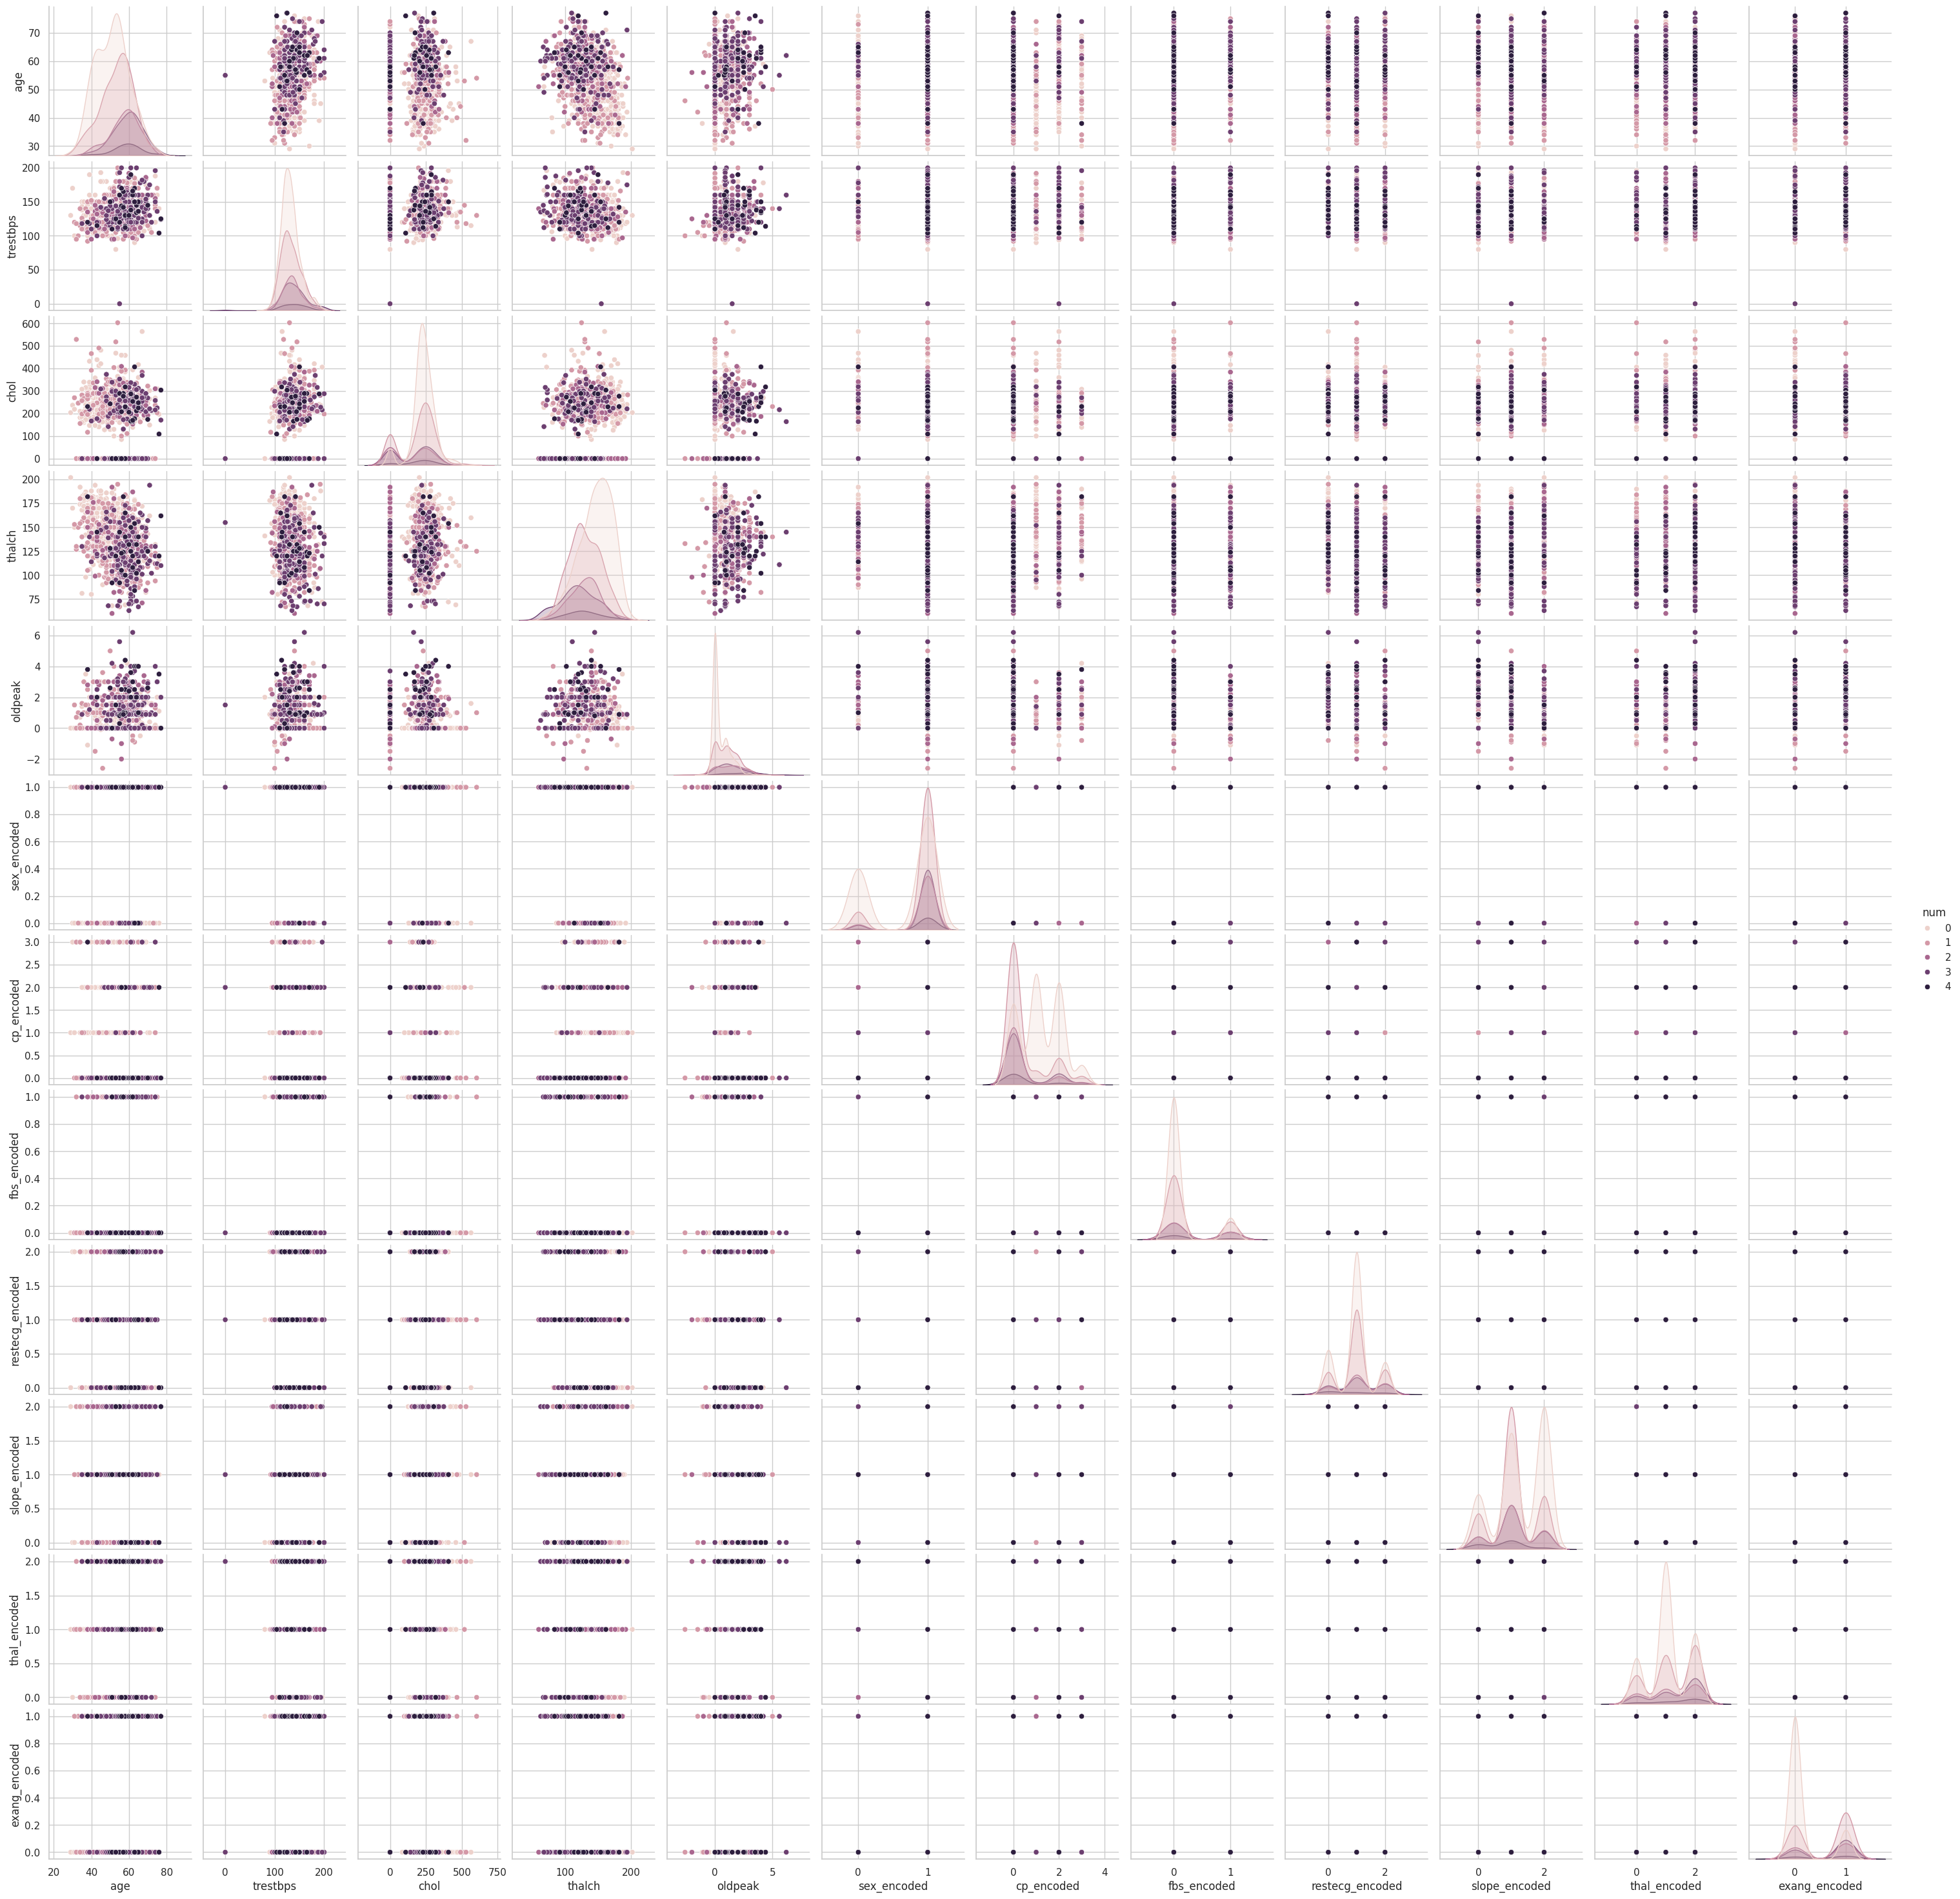

In [72]:
sns.pairplot(df, hue = 'num')

In [73]:
# Calculate the IQR
Q1 = df['chol'].quantile(0.25)
Q3 = df['chol'].quantile(0.75)
IQR = Q3 - Q1

In [74]:
# Define the upper and lower bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

In [75]:
# Remove outliers
df = df[df['chol'] >= lower_bound]
df = df[df['chol'] <= upper_bound]

In [77]:
# Capping the outliers
df['chol'] = np.where(df['chol'] < lower_bound, lower_bound,
np.where(df['chol'] > upper_bound, upper_bound, df['chol']))

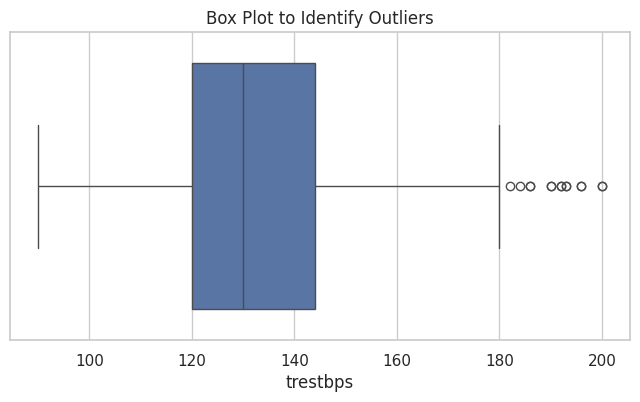

In [78]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['trestbps'])
plt.title('Box Plot to Identify Outliers')
plt.show()

In [79]:
# Define the target variable (Y)
Y = df['num']
Y

0      0
1      0
2      0
3      0
4      0
      ..
900    4
902    4
904    4
906    4
907    4
Name: num, Length: 720, dtype: int64

In [80]:
# Define the features (X) by dropping the target column
X = df.drop(columns=['num'])
X


age  trestbps   chol  thalch   oldpeak  sex_encoded  cp_encoded  \
0     63       145  233.0     150  2.300000            1           3   
1     41       135  203.0     132  0.000000            1           1   
2     57       140  192.0     148  0.400000            1           0   
3     52       118  186.0     190  0.000000            1           3   
4     57       110  201.0     126  1.500000            1           0   
..   ...       ...    ...     ...       ...          ...         ...   
900   61       190  287.0     150  2.000000            1           0   
902   62       160  254.0     108  3.000000            1           0   
904   62       166  170.0     120  3.000000            1           0   
906   56       144  208.0     105  0.891253            1           2   
907   57       142  277.0     182  0.891253            1           0   

     fbs_encoded  restecg_encoded  slope_encoded  thal_encoded  exang_encoded  
0              1                0              0             0              0  
1              0                1              1             0              0  
2              0                1              1             0              0  
3              0                0              1             0              0  
4              0                1              1             0              1  
..           ...              ...            ...           ...            ...  
900            1                0              0             2              1  
902            1                2              1             1              1  
904            0                2              1             2              1  
906            1                2              0             0              1  
907            1                2              1             2              0  

[720 rows x 12 columns]

In [81]:
x_train, x_test , y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [82]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(576, 12) (576,) (144, 12) (144,)


In [83]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [89]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=5,random_state=48,min_samples_split=15)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=15,
                       random_state=48)

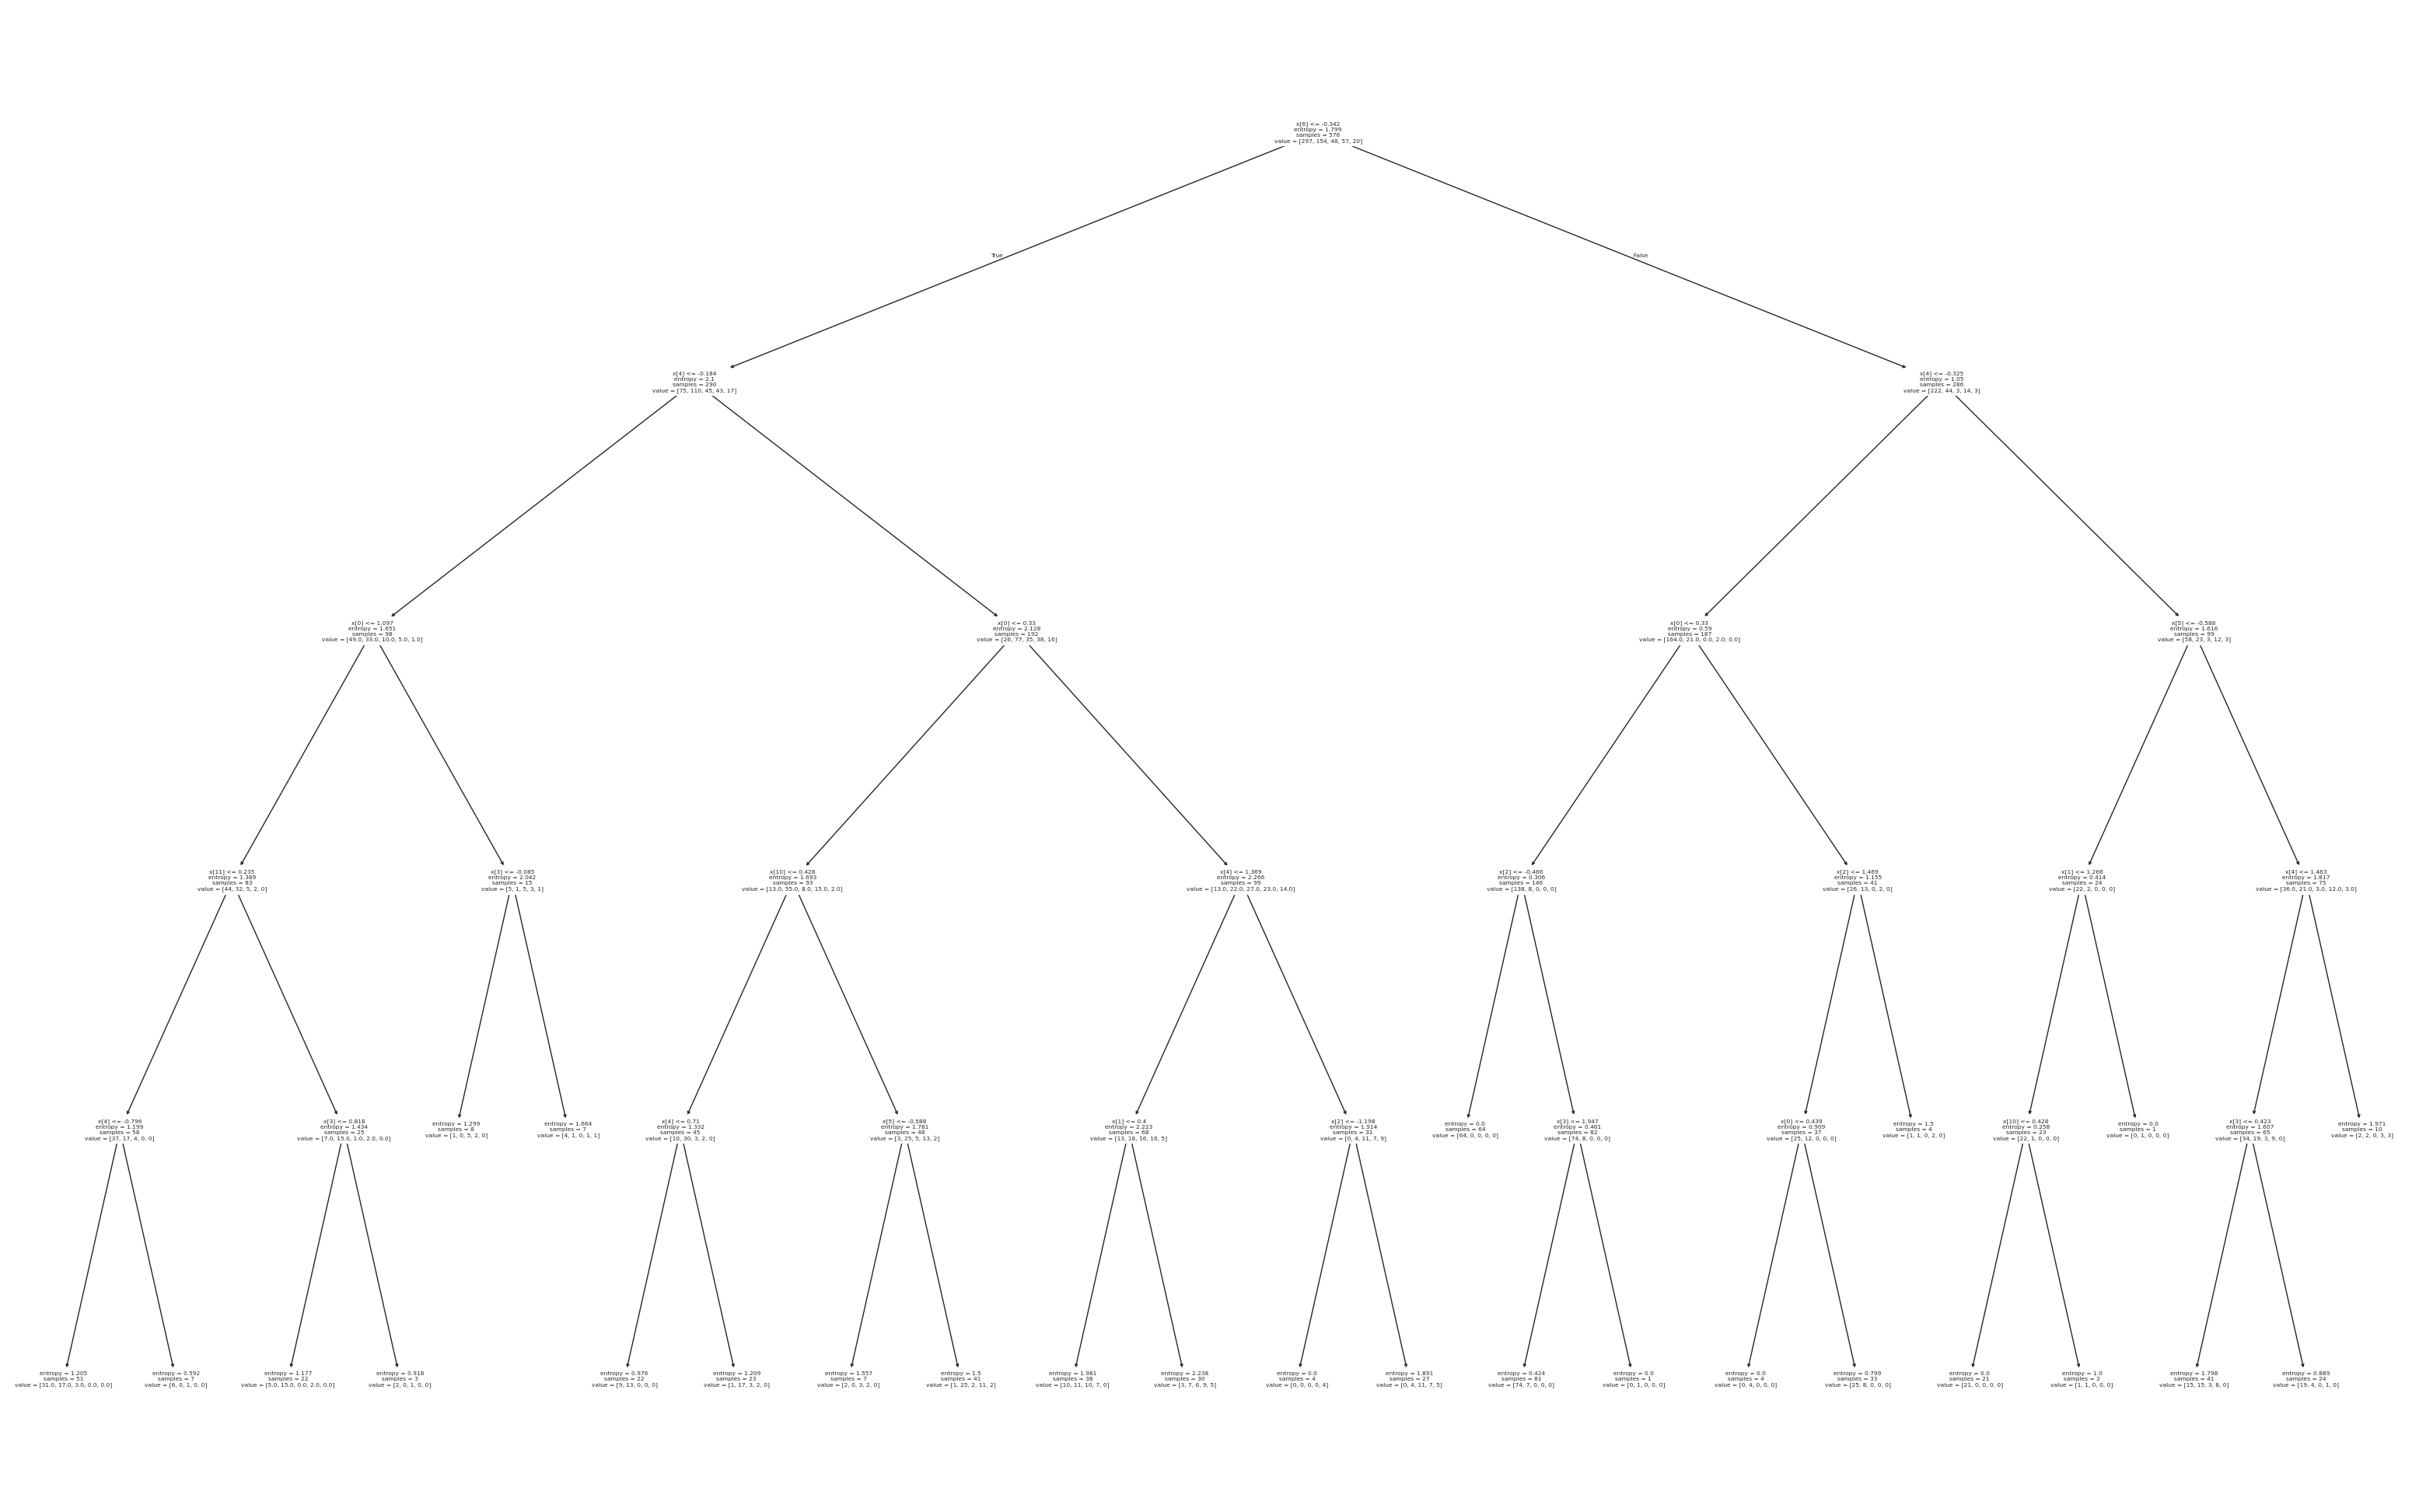

In [91]:
#PLot the decision tree
plt.figure(figsize=(40, 25))
plot_tree(model)
plt.show()


[Text(0.5436046511627907, 0.9166666666666666, 'cp_encoded <= -0.342\nentropy = 1.799\nsamples = 576\nvalue = [297, 154, 48, 57, 20]\nclass = 0'),
 Text(0.28488372093023256, 0.75, 'oldpeak <= -0.184\nentropy = 2.1\nsamples = 290\nvalue = [75, 110, 45, 43, 17]\nclass = 1'),
 Text(0.4142441860465116, 0.8333333333333333, 'True  '),
 Text(0.1511627906976744, 0.5833333333333334, 'age <= 1.097\nentropy = 1.651\nsamples = 98\nvalue = [49.0, 33.0, 10.0, 5.0, 1.0]\nclass = 0'),
 Text(0.09302325581395349, 0.4166666666666667, 'exang_encoded <= 0.235\nentropy = 1.389\nsamples = 83\nvalue = [44, 32, 5, 2, 0]\nclass = 0'),
 Text(0.046511627906976744, 0.25, 'oldpeak <= -0.796\nentropy = 1.199\nsamples = 58\nvalue = [37, 17, 4, 0, 0]\nclass = 0'),
 Text(0.023255813953488372, 0.08333333333333333, 'entropy = 1.205\nsamples = 51\nvalue = [31.0, 17.0, 3.0, 0.0, 0.0]\nclass = 0'),
 Text(0.06976744186046512, 0.08333333333333333, 'entropy = 0.592\nsamples = 7\nvalue = [6, 0, 1, 0, 0]\nclass = 0'),
 Text(0.139

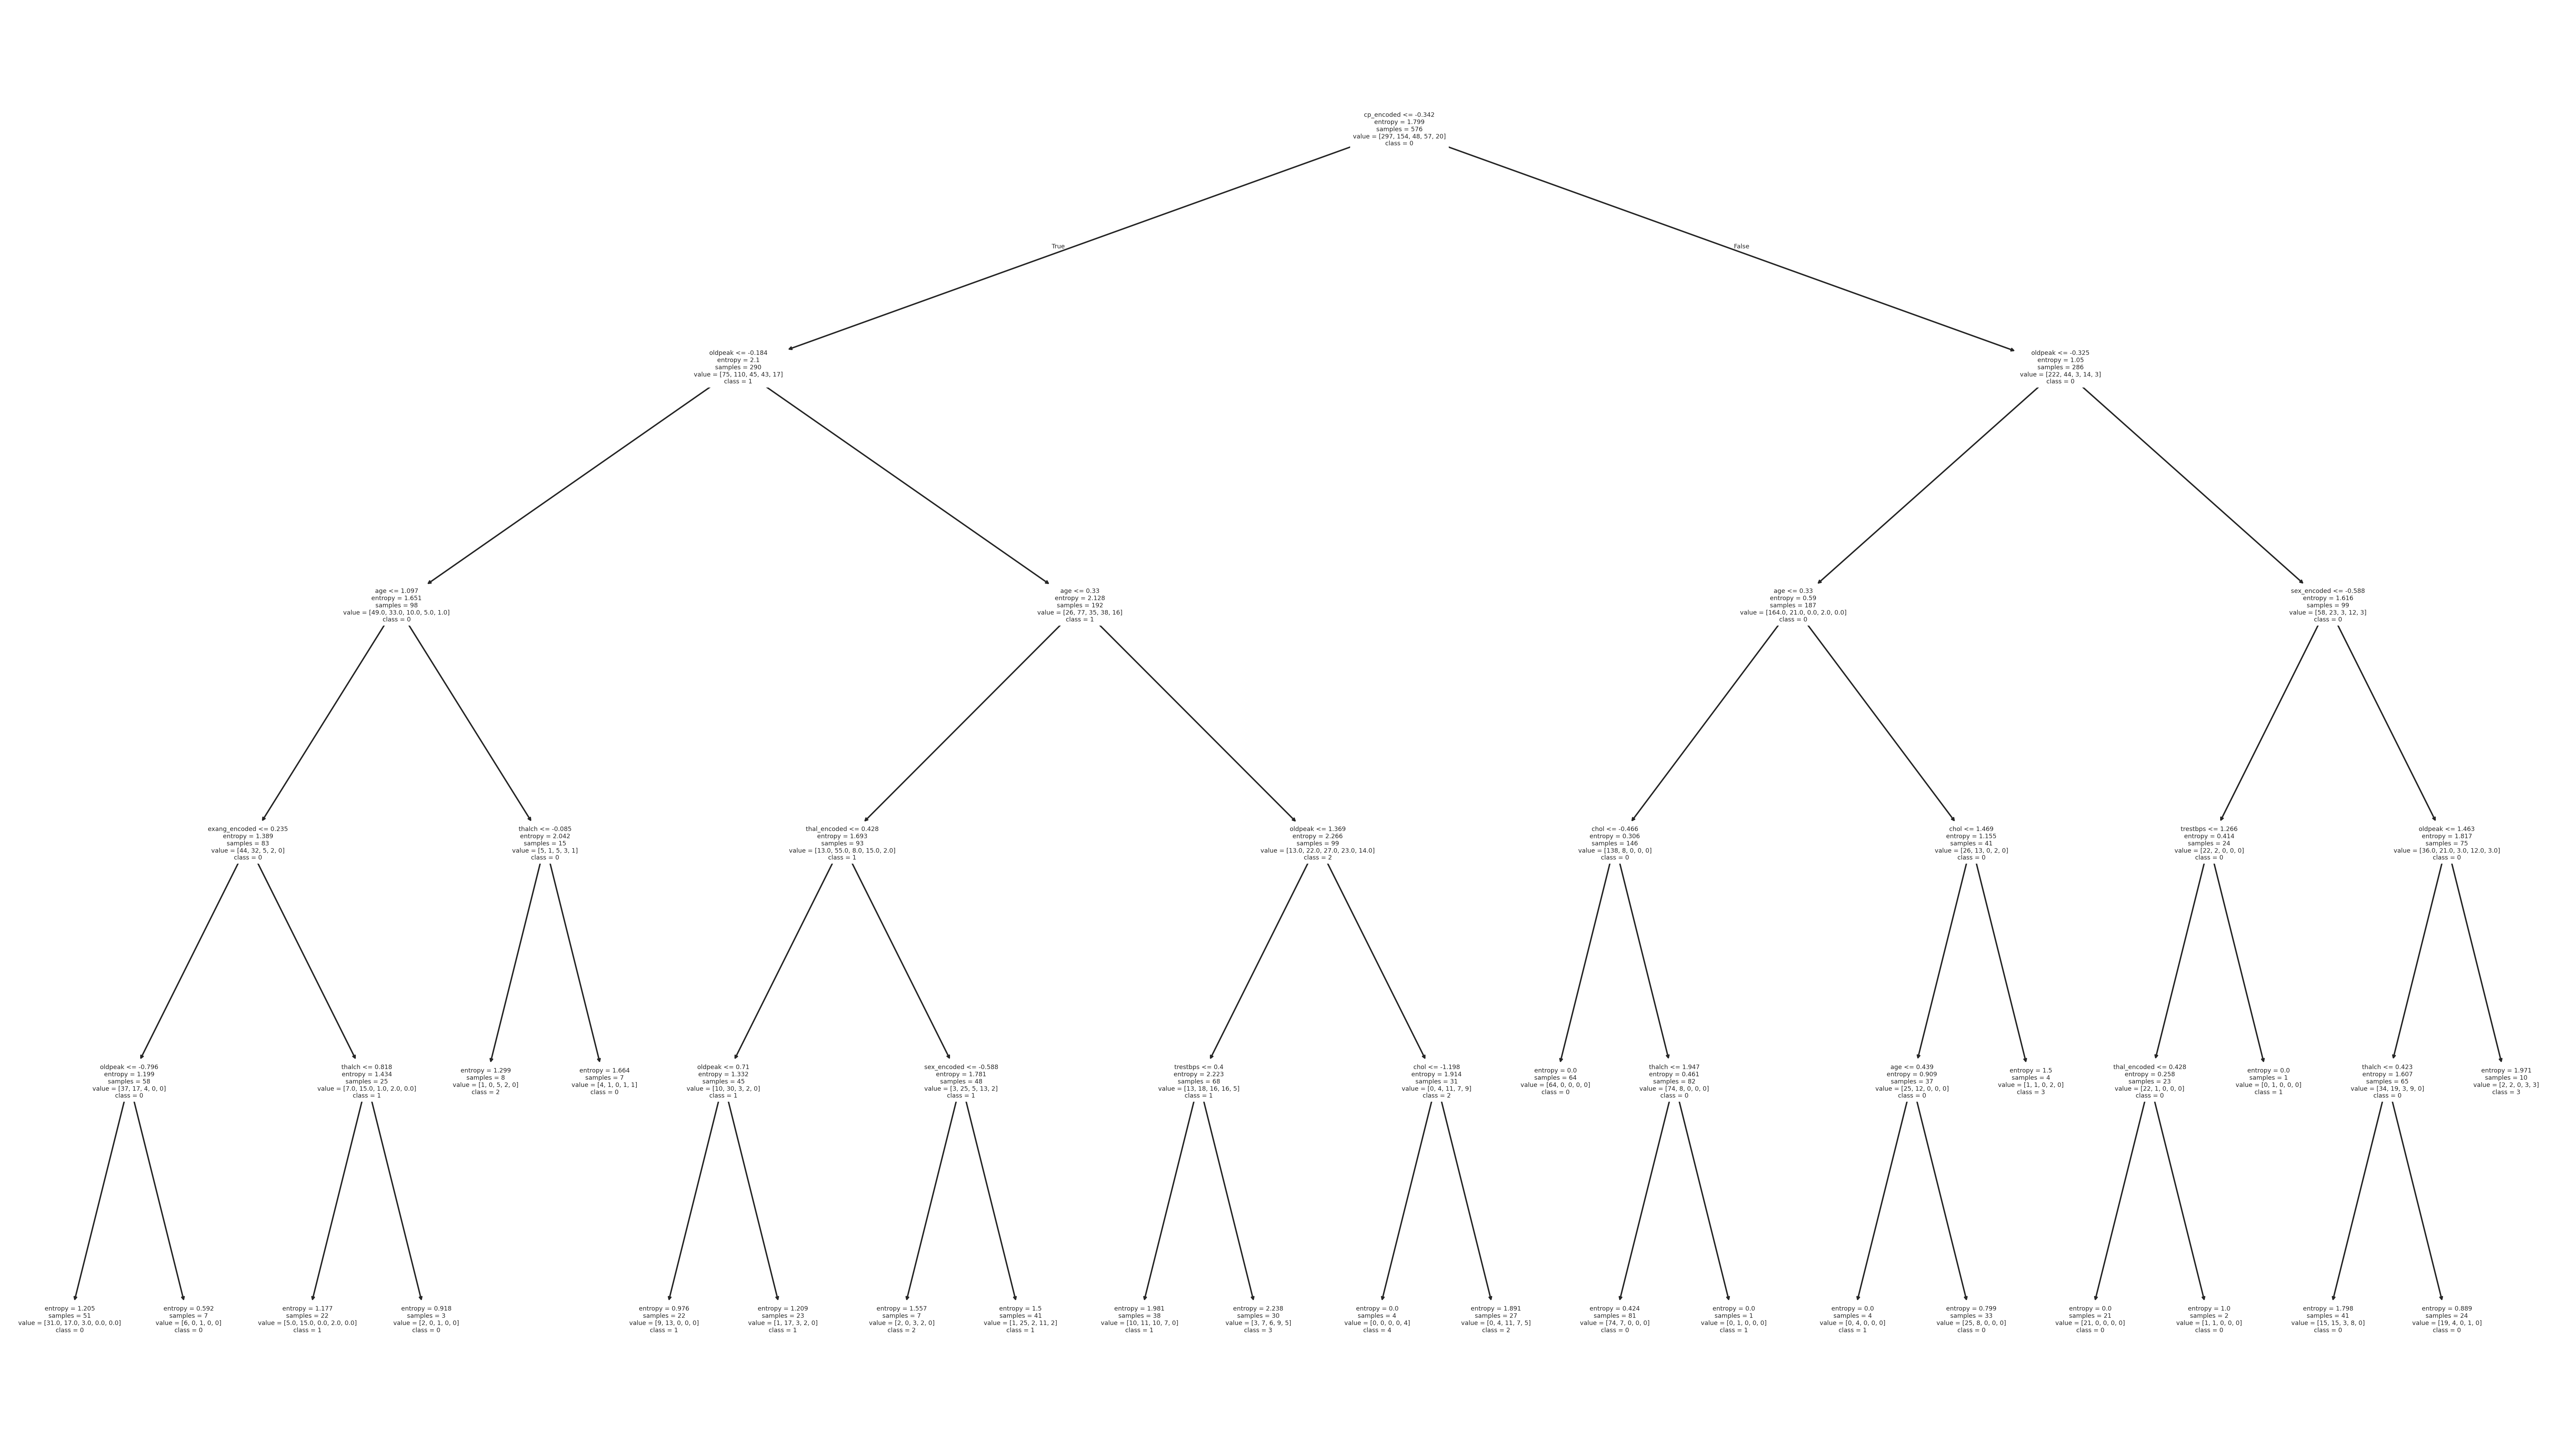

In [92]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (32,18), dpi=300)

plot_tree(model, feature_names=X.columns, class_names=['0', '1','2','3','4'], filled=False)

In [93]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
preds


array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 4, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 1,
       3, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 3, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 2, 2, 0, 3, 1, 0, 1, 1, 2, 1, 0, 0, 1, 1, 2,
       1, 1, 0, 0, 1, 0, 4, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 1,
       0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 3, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [94]:
pd.Series(preds).value_counts()

0    82
1    47
3     7
2     6
4     2
Name: count, dtype: int64

In [95]:
# Accuracy
np.mean(preds==y_test)


0.625

In [96]:
# Calculate accuracy
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


In [97]:
# Generate classification report
report = classification_report(y_test, preds)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        72
           1       0.57      0.61      0.59        44
           2       0.17      0.07      0.10        14
           3       0.29      0.17      0.21        12
           4       0.00      0.00      0.00         2

    accuracy                           0.62       144
   macro avg       0.35      0.34      0.34       144
weighted avg       0.58      0.62      0.60       144



In [99]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4,random_state=77)

In [101]:
#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.625

In [102]:
# Interview Questions and Answers
print("\nInterview Questions and Answers:")

# Question 1: Common Hyperparameters of Decision Tree
print("1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?")
print("- max_depth: Controls the maximum depth of the tree. A deeper tree can capture more patterns but may overfit.")
print("- min_samples_split: The minimum number of samples required to split an internal node. Higher values reduce overfitting.")
print("- criterion: The function used to measure the quality of a split (e.g., 'gini' or 'entropy').");
print("- min_samples_leaf: The minimum number of samples required to be at a leaf node. Higher values smoothen the decision boundary.")

# Question 2: Label Encoding vs. One-Hot Encoding
print("\n2. What is the difference between Label Encoding and One-hot Encoding?")
print("- Label Encoding: Assigns a unique numerical value to each category (e.g., {A:0, B:1, C:2}). Can introduce an ordinal relationship that doesn't exist.")
print("- One-Hot Encoding: Converts categorical variables into binary vectors, ensuring no false ordinal relationships.")



Interview Questions and Answers:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
- max_depth: Controls the maximum depth of the tree. A deeper tree can capture more patterns but may overfit.
- min_samples_split: The minimum number of samples required to split an internal node. Higher values reduce overfitting.
- criterion: The function used to measure the quality of a split (e.g., 'gini' or 'entropy').
- min_samples_leaf: The minimum number of samples required to be at a leaf node. Higher values smoothen the decision boundary.

2. What is the difference between Label Encoding and One-hot Encoding?
- Label Encoding: Assigns a unique numerical value to each category (e.g., {A:0, B:1, C:2}). Can introduce an ordinal relationship that doesn't exist.
- One-Hot Encoding: Converts categorical variables into binary vectors, ensuring no false ordinal relationships.
